# Time Series Analysis
The data for this exercise is from a Kaggle dataset: https://www.kaggle.com/datasets/limkongkong/airpassengers

Firstly, we need to download the data from Kaggle using opendatasets Python package.
You need to have your Kaggle credential here to be able to download the file.
For further information you can check [here](https://www.kaggle.com/docs/api).

> In case you didn't have a Kaggle account you can also download the data manually and put them in the same folder as this notebook. Then you can skip the next two sections and start reading the files from your local directory.

Here are the packages that we need in this exercise:

In [1]:
!pip install opendatasets
!pip install pmdarima

In [2]:
# Skip this section if you already downloaded the file
#  and put it in the same directory as this notebook
import opendatasets as od
od.download("https://www.kaggle.com/datasets/limkongkong/airpassengers", force=True)

100%|██████████| 764/764 [00:00<00:00, 199kB/s]

To start, let’s import the Pandas library and read the airline passenger data into a data frame:

In [3]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import warnings
# Silent warning messages
warnings.filterwarnings("ignore")

# Read the file into Pandas DataFrame
df = pd.read_csv("airpassengers/AirPassengers.csv")

Now, let’s display the first five rows of data using the data frame head() method:

In [4]:
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


We can see that the data contains a column labeled “Month” that contains dates. In that column, the dates are formatted as year–month.

The second column is labeled “#Passengers,” and it contains the number of passengers for the year–month.

Let’s take a look at the time interval of the data:

In [5]:
print("Start Month:\t", df.Month.min())
print("End Month:\t", df.Month.max())
print("The type of the data in Month columns is:", type(df.Month.min()))

Start Month:	 1949-01
End Month:	 1960-12
The type of the data in Month columns is: <class 'str'>


The next thing we will want to do is convert the month column into a datetime object. This will allow it to programmatically pull time values like the year or month for each record.

To do this, we use the Pandas to_datetime() method:

In [6]:
# Convert Month column into datetime instead of String
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())
print("The type of the data in Month columns is:", type(df.Month.min()))

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121
The type of the data in Month columns is: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

The next thing we can do is convert the month column to an index. This will allow us to more easily work with some of the packages we will be covering later:


In [7]:
# Set Month data as index of the DataFrame
df.set_index('Month', inplace=True)
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


# Stationarity
Stationarity is a key part of time series analysis. Simply put, stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA and Seasonal ARIMA (SARIMA).

## Visualizing Time-series
Next, let’s generate a time series plot. This will allow us to visualize the time series data.

<AxesSubplot:xlabel='Month'>

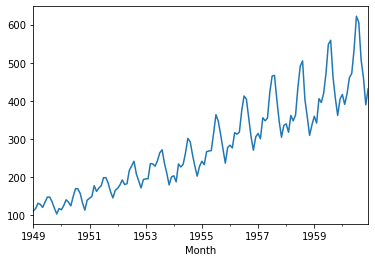

In [8]:
# Plot the time-indexed data
df['#Passengers'].plot()

From the above below, we can see that there is a Trend compoenent in the series

## Augmented Dickey Fuller (ADF) Test

We will use the Dickey Fuller test to check for stationarity in our data. This test will generate critical values and a p-value, which will allow us to accept or reject the `null hypothesis that there is no stationarity`. If we reject the null hypothesis, that means we accept the alternative, which states that there is stationarity.
> In statistical testing, if our statistical analysis shows that the significance level is below the cut-off value we have set (e.g., either 0.05 or 0.01), we reject the null hypothesis and accept the alternative hypothesis

These values allow us to test the degree to which present values change with past values. If there is no stationarity in the data set, a change in present values will not cause a significant change in past values.

Let’s test for stationarity in our airline passenger data.

Next, let’s import the augmented Dickey-Fuller test from the statsmodels package. The documentation for the test can be found [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

In [9]:
from statsmodels.tsa.stattools import adfuller

Next, let’s pass our data frame into the adfuller method. Here, we specify the autolag parameter as “AIC,” which means that the lag is chosen to minimize the information criterion:

In [10]:
# Run the test on time-indexed data
adft = adfuller(df['#Passengers'])

Next, let’s store our results in a data frame display it:

In [11]:
test_output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']],
                               "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                         "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(test_output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


We can see that our data is not stationary from the fact that our p-value is greater than 5 percent and the test statistic is greater than the critical value. We can also draw these conclusions from inspecting the data, as we see a clear, increasing trend in the number of passengers.

# Decomposition
Trend decomposition is another useful way to visualize the trends in time series data. To proceed, let’s import seasonal_decompose from the statsmodels package:

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:



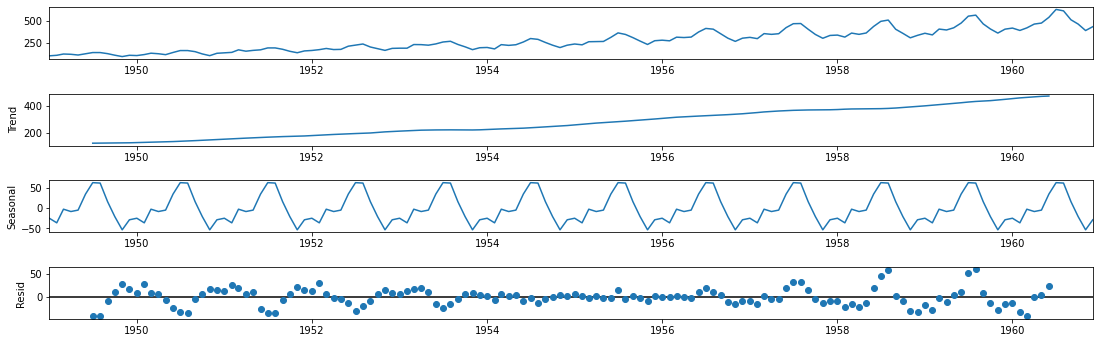

In [13]:
# Decompose time-series using Additive model
decompose = seasonal_decompose(df[['#Passengers']].dropna(), model='additive')
# Plot time-series components
fig = decompose.plot()
# Re-size the figure
fig.set_size_inches((17, 5))
# Show the figure
plt.show()

From this plot, we can clearly see the increasing trend in number of passengers and the seasonality patterns in the rise and fall in values each year.

# Forecasting
Time series forecasting allows us to predict future values in a time series given current and past data. Here, we will use the ARIMA method to forecast the number of passengers, which allows us to forecast future values in terms of a linear combination of past values. We will use the auto_arima package, which will allow us to forgo the time consuming process of hyperparameter tuning.

# ARIMA Model Parameters
There are multiple approaches to set ARIMA parameters as they can be determined by either looking at the data properties or empirically by fitting the model and evaluating the performance. 
we need to determine the order of differencing “d.” by checking the autocorrelation plot.

## Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. This is a measure of how correlated time series data is at a given point in time with past values, which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.

The Pandas data frame has an autocorrelation method that we can use to calculate the autocorrelation in our passenger data. Let’s do this for a one-month lag:

In [14]:
# Calculate autocorrelation with the lag-1 of the time-series
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
# Print the first-lag autocorrelation value
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9601946480498523


we can proceed to generate an autocorrelation visualization using statsmodel, and matplotlib. These modules have been abstracted to a great degree and this entire process can be done in only a few lines of code:

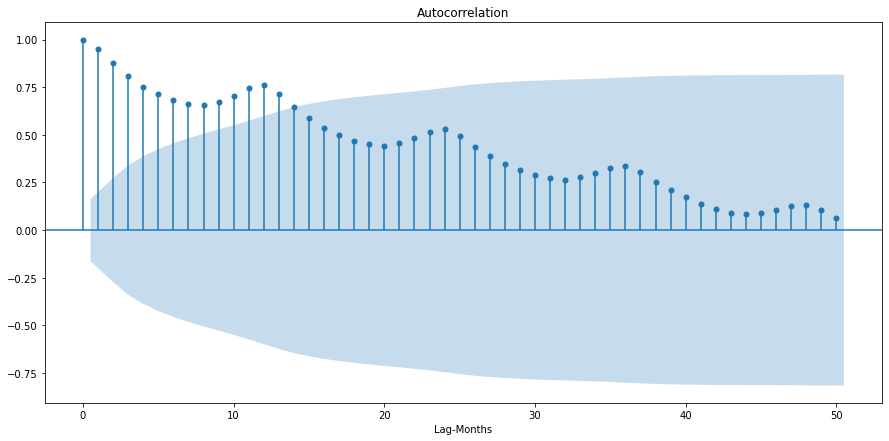

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
# Use the Autocorrelation function from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
fig = plot_acf(df[['#Passengers']], lags=50)
# Re-size the figure
fig.set_size_inches((15, 7))
# Set x axis label
plt.xlabel("Lag-Months")
# Show the AR as a plot
plt.show()

### Interpreting the Autocorrelation
This looks pretty interesting but ultimately doesn’t offer much utility without knowing how to read it! The blue shaded region is the confidence interval with a default value of α = 0.05. Anything within this range represents a value that has no significant correlation with the most recent value for the #passengers.

The vertical lines with markers at their tops are the “lags” that represent a specific number (50, in this case) of previous values. These represent the correlation value (shown on the y-axis) and diminish at a steady rate as their proximity from the recent number of passengers increases. That’s not the case with all data but certainly so with ours.

Notice that for a lag zero, ACF is always equal to one, which makes sense because the signal is always perfectly correlated with itself.

This lets us know that previous number of passengers influence the current value but the significance of that influence decreases steadily with time. Specifically, values beyond the 14th previous day have no significant predictive power on the current number of passengers.

The strength of this relationship is measured on a scale of -1 to 1 when -1 being a 100% negative correlation and with a value of 1 being a 100% positive correlation. This measure is shown on the y-axis.

Further more, we can obviously see the 12-Month seasonality since the pattern of correlations repeat itself every 12 month.


### Finding q 
“q” can be estimated by looking at the ACF plot. Looking at the number of lags crossing the threshold, we can determine how much of the past would be significant enough to consider for the future. The ones with high correlation contribute more and would be enough to predict future values. From the plots above, the moving average (MA) parameter can be set to 12.

### Seasonal Adjustment with Differencing
A simple way to correct for a seasonal component is to use differencing.

If there is a seasonal component at the level of one year, then we can remove it on an observation today by subtracting the value from last year.

Let's look at `Seasonal First Differencing` time-series and Autocorrelation plot:

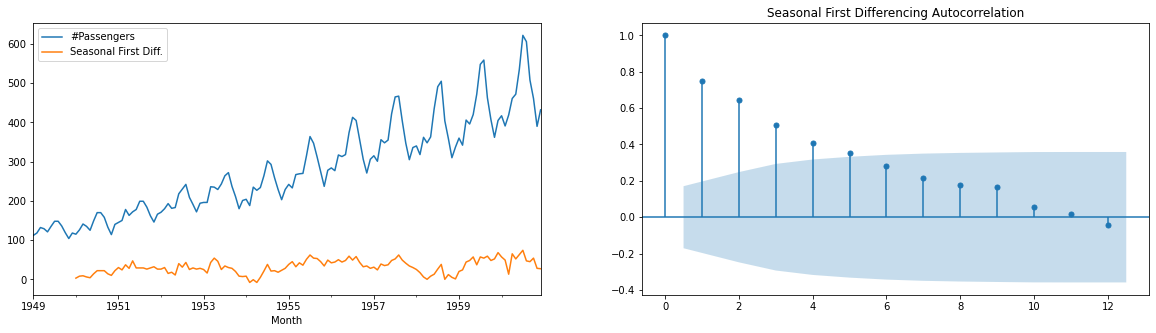

In [16]:
# Creat a figure with 2 separate sub-plots
fig, ax = plt.subplots(1,2, figsize=(20,5))
# Plot the actual time-series in the first sub-plot
df[['#Passengers']].plot(ax=ax[0])
# Plot the 12 Months differenced the time-series in the first sub-plot
df[['#Passengers']].diff(12).plot(ax=ax[0])
# Show the labels in the first sub-plot
leg = ax[0].legend()
leg.get_texts()[1].set_text('Seasonal First Diff.')

# Plot ACF of the seasonal first (12-months) differencing in the second sub-plot
plot_acf(df[['#Passengers']].diff(12).dropna(), lags=12, ax=ax[1])
# Add title to the second sub-plot
ax[1].set_title('Seasonal First Differencing Autocorrelation')
plt.show()

### Finding d
Let’s see how the differencing makes the data stationary:

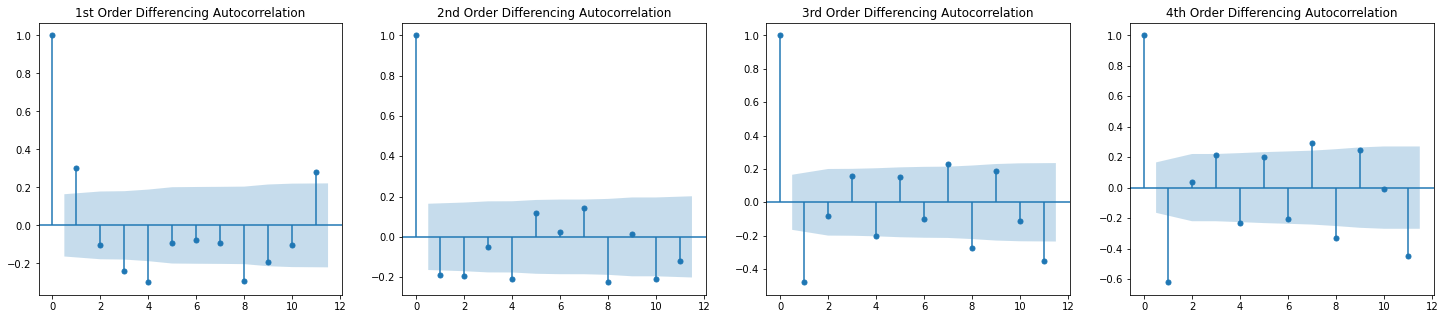

In [17]:
# Creat a figure with 4 separate sub-plots
fig, ax = plt.subplots(1, 4, sharex=True, figsize=(25,5))
# 1st Differencing
df['1st_difference'] = df['#Passengers'].diff()
plot_acf(df[['1st_difference']].dropna(), lags=11, ax=ax[0])
ax[0].set_title('1st Order Differencing Autocorrelation')
# 2nd Differencing
df['2nd_difference'] = df['#Passengers'].diff().diff()
plot_acf(df[['2nd_difference']].dropna(), lags=11, ax=ax[1])
ax[1].set_title('2nd Order Differencing Autocorrelation')
# 3rd Differencing
df['3rd_difference'] = df['#Passengers'].diff().diff().diff()
plot_acf(df[['3rd_difference']].dropna(), lags=11, ax=ax[2])
ax[2].set_title('3rd Order Differencing Autocorrelation')
# 4th Differencing
df['4th_difference'] = df['#Passengers'].diff().diff().diff().diff()
plot_acf(df[['4th_difference']].dropna(), lags=11, ax=ax[3])
ax[3].set_title('4th Order Differencing Autocorrelation')
plt.show()

As seen above, first-order differencing shakes up autocorrelation considerably and in the second order even more so we can consider the order of differencing (“d”) as 1

## Partial autocorrelation
In order to find the order of the AR term (p) we use the Partial autocorrelation Plot. Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

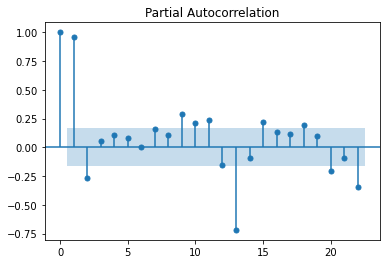

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
# Plot PACF for the time-series 
plot_pacf(df['#Passengers'].dropna())
plt.show()

### Finding p 
we see the first 2 lags are the most significant and then there is also another spike at lag 12. Thus, we consider “p” to be either 2 or 12 (let's go with 12)

# Training a Forcasting Model

## Train/Test Split

Similar to any other Machine Learning models we need to divide our data into train and test to learn based on the train data and test the trained model on test (unseen) data.

Here we are going to preserve the last 2 years of the data for testing and will only use the data up to that point for training. 

Let’s split our data for training and testing and visualize the split:

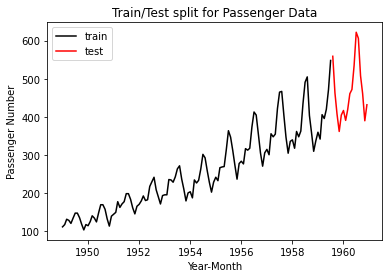

In [19]:
# Create a new column based on the time index
df['Date'] = df.index
# Filter the data to separate train from test data
train = df.query("Date < '1959-08-01'")[['#Passengers']]
# Keep the last 24 months of the data for test
test = df.query("Date >= '1959-08-01'")[['#Passengers']]

# Plot train and test data 
plt.plot(train, color = "black", label='train')
plt.plot(test, color = "red", label='test')
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
plt.legend()
plt.show()

The black line corresponds to our training data and the red line corresponds to our test data.

### Train ARIMA Model
Based on the analysis we have done, we found the parameters of the ARIMA mode. Therefore, our final ARIMA model can be defined as **ARIMA(p=12, d=1, q=12)**.

Let's train the model using these parameters:

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Train an ARIMA model on train data with the predefined parameters
model = ARIMA(train['#Passengers'], order=(12,1,12))
model_fit = model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
# Look at the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  127
Model:               ARIMA(12, 1, 12)   Log Likelihood                -473.579
Date:                Thu, 09 Jun 2022   AIC                            997.158
Time:                        15:40:52   BIC                           1068.065
Sample:                    01-01-1949   HQIC                          1025.965
                         - 07-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0907      0.127      0.714      0.475      -0.158       0.340
ar.L2         -0.0905      0.130     -0.698      0.485      -0.344       0.164
ar.L3          0.0577      0.124      0.467      0.6

## How to Interpret ARIMA Model Results?
As seen above, the model summary provides several statistical measures to evaluate the performance of our model. Moreover, we also know the coefficient values for each of the parameters. As we kept the value of the MA parameter or “q” as 4, we have fource trained coefficients for MA and 2 for AR.

Other than that we see the scores such as Akaike Information Critera (AIC), Bayesian Information Criterion (BIC), Hannan-Quinn Information Criterion (HQIC), and the standard deviation of innovations (innovations are the difference of the real value at time t and the predicted value at that time).

Now, let’s predict and display the output of our model for the test data:

In [22]:
# Predict the next values (according to the size of the test data)
forecast = model_fit.forecast(len(test), dynamic=True).to_frame('Prediction')

Let's look at the results in comparison to the actual data:

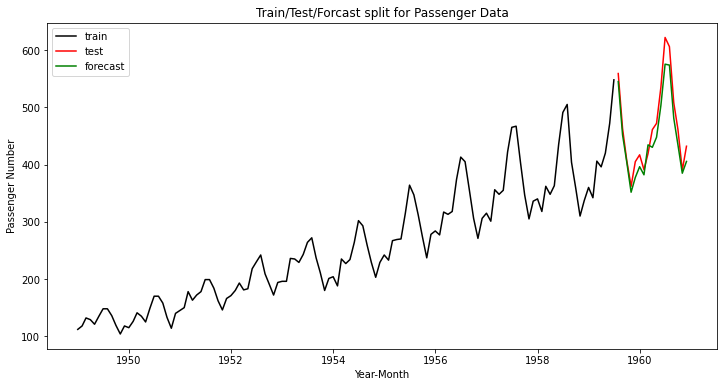

In [23]:
# Create a figure with specific size
plt.figure(figsize=(12,6))

# Plot the original train/test time-series and the predicted one from the model
plt.plot(train, color = "black", label='train')
plt.plot(test, color = "red", label='test')
plt.plot(forecast, color = 'green', label='forecast')

# Set the title for our plot
plt.title("Train/Test/Forcast split for Passenger Data")

# Set labels for our x and y axis
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')

# Show the label for each time-series to know which color is for which
plt.legend()

# Show the final plot
plt.show()

### Auto ARIMA
Alternatively we can use auto_arima which searches for the best parameters for our ARIMA model.

Let’s import auto_arima from the pdmarima package, train our model and generate predictions:

In [24]:
# Import
from pmdarima.arima import auto_arima
# Train auto-arima using train data
auto_model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
auto_model_fit = auto_model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1166.722, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1215.692, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1207.523, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1204.978, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1215.397, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1199.226, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2.425 seco

In [25]:
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  127
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -577.361
Date:                Thu, 09 Jun 2022   AIC                           1166.722
Time:                        15:40:58   BIC                           1183.740
Sample:                             0   HQIC                          1173.636
                                - 127                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6749      0.202      3.345      0.001       0.279       1.070
ar.L1          1.6533      0.030     55.049      0.000       1.594       1.712
ar.L2         -0.9222      0.029    -31.623      0.0

In [32]:
# Predict the next values (according to the size of the test data)
auto_forecast = auto_model.predict(n_periods=len(test))
auto_forecast = pd.DataFrame(auto_forecast, index = test.index, columns=['Prediction'])

Let's look at the results in comparison to the actual data:

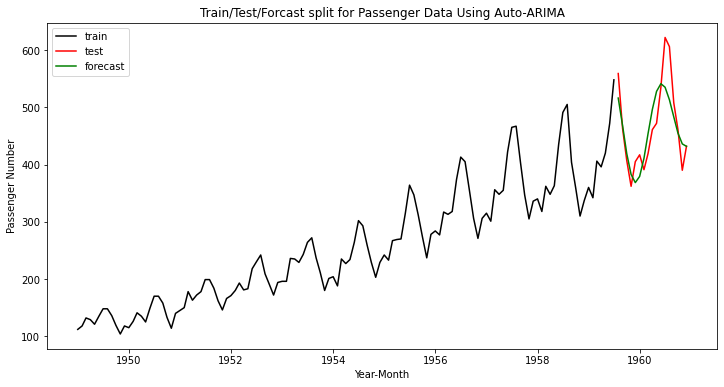

In [27]:
# Create a figure with specific size
plt.figure(figsize=(12,6))

# Plot the original train/test time-series and the predicted one from the model
plt.plot(train, color = "black", label='train')
plt.plot(test, color = "red", label='test')
plt.plot(auto_forecast, color = 'green', label='forecast')
# Set the title for our plot
plt.title("Train/Test/Forcast split for Passenger Data Using Auto-ARIMA")
# Set labels for our x and y axis
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
# Show the label for each time-series to know which color is for which
plt.legend()
# Show the final plot
plt.show()

# How to Evaluate ARIMA Model in Python?
Beyond visual analysis, we can use various error measures and metrics to evaluate the performance of our ARIMA model in Python. 
For future use on a large number of predictions, we cannot evaluate the samples manually. We can use some of the many error metrics or Key Performance Indicators (KPI) available.
Some insightful performance error metrics such as root mean squared (RMSE), mean absolute error (MAE), mean percentage error (MPE), mean absolute percentage error (MAPE), correlation coefficient (to measure similarity), and max error.

In [31]:
# Import Numpy
import numpy as np
# Import different evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
  mean_absolute_percentage_error, max_error

def evaluate_model(test_df, forecast_df):
  actual_values = test_df['#Passengers'].values
  predicted_values = forecast_df["Prediction"].values
  # Root Mean Squared Error
  rmse = mean_squared_error(actual_values, predicted_values, squared=False)
  # Mean Absolute Error
  mae = mean_absolute_error(actual_values, predicted_values)
  # Mean Absolute Percentage Error
  mape = mean_absolute_percentage_error(actual_values, predicted_values)
  # Correlation Coefficient
  corr = np.corrcoef(actual_values, predicted_values)[0,1]
  # Max Error
  max_e = max_error(actual_values, predicted_values)

  display(pd.DataFrame({'rmse':[rmse], 'mae':[mae], 'mape':[mape],
                        'corr':[corr], 'max_e':[max_e]}))


In [29]:
print("Model Evaluation of ARIMA with Fixed Params:")
evaluate_model(test, forecast)
print("Model Evaluation of Auto-ARIMA:")
evaluate_model(test, auto_forecast)

Model Evaluation of ARIMA with Fixed Params:


,rmse,mae,mape,corr,max_e
0,24.128824,21.318899,0.04437,0.986115,46.650477


Model Evaluation of Auto-ARIMA:


,rmse,mae,mape,corr,max_e
0,42.118826,33.174889,0.068775,0.833827,92.849508


However, these metrics are popular to measure errors in general regression models. In the case of time-series models, change in values over time, and metrics like MAE or MAPE do not easily capture the scale of the values. MAE finds the absolute difference between predicted and actual values and averages them over all samples in the test set. Over time, the change in values is lost, and the context of the set's actual values is also significant.

For example, an MAE of 100 would be a good score if the actual values are of the order of 10,000s but a terrible score if the values lie in the hundreds. The same goes for RMSE.

However, MAPE is scale-independent and is reliable for such a changing time series as long as the value never reaches 0 else, the score will be undefined. A better alternative is the **mean absolute scaled error** or **MASE**

<img width=300px src="https://dezyre.gumlet.io/images/blog/how-to-build-arima-model-in-python/image_459678857311641822385066.jpg?w=1100&dpr=1.0" />

MASE considers the data the model was trained on (ai) in the form of 1st order changes or differences. This makes it a good measure for time-series data irrespective of scale or time. We can implement it in Python as below

In [30]:
train_values = train['#Passengers'].values
n = len(train)
d = np.abs(np.diff(train_values)).sum() / (n-1)
mase = mae / d
print("mase:", mase)

NameError: name 'mae' is not defined

We can also create a new fuction to calculate the MASE:

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

print("mase:", mean_absolute_scaled_error(actual_values, predicted_values, train_values))